## S06 T01: Tasca dades, probabilitats i estadístiques

### NIVELL 1

### Ex1
##### Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [118]:
%matplotlib inline
import numpy as np
import pandas as pd
import random


df = pd.read_csv("Match.csv")

df.head()

,match_id,round,date,avg_minutes_game,avg_seconds_point,avg_minutes_set,tournament,year,match_minutes
0,m_2019_A_0,1st Round,2019-01-14,4.81,46.8,43.3,Australian Open,2019,173.0
1,m_2019_A_1,1st Round,2019-01-14,3.95,35.7,40.5,Australian Open,2019,162.0
2,m_2019_A_2,1st Round,2019-01-14,4.86,42.3,43.8,Australian Open,2019,175.0
3,m_2019_A_3,1st Round,2019-01-14,4.43,43.3,41.0,Australian Open,2019,164.0
4,m_2019_A_4,1st Round,2019-01-14,4.37,39.7,43.7,Australian Open,2019,131.0


#### Agafem avg_seconds_point

In [119]:
df.dtypes
print ( r'Total {}'.format (len(df)))
df.info()

Total 10160
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10160 entries, 0 to 10159
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match_id           10160 non-null  object 
 1   round              10160 non-null  object 
 2   date               10160 non-null  object 
 3   avg_minutes_game   10114 non-null  float64
 4   avg_seconds_point  10115 non-null  float64
 5   avg_minutes_set    10078 non-null  float64
 6   tournament         10160 non-null  object 
 7   year               10160 non-null  int64  
 8   match_minutes      10117 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 714.5+ KB


In [120]:
#### There are 45 null records. The % is so low from all records, let's remove all of  them!
df1 = df.dropna()
df1.info()
df1['avg_seconds_point'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10078 entries, 0 to 10159
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match_id           10078 non-null  object 
 1   round              10078 non-null  object 
 2   date               10078 non-null  object 
 3   avg_minutes_game   10078 non-null  float64
 4   avg_seconds_point  10078 non-null  float64
 5   avg_minutes_set    10078 non-null  float64
 6   tournament         10078 non-null  object 
 7   year               10078 non-null  int64  
 8   match_minutes      10078 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 787.3+ KB


0.0     255
38.8    113
37.9    110
40.1    110
37.5    108
       ... 
54.1      1
69.1      1
79.7      1
53.1      1
27.6      1
Name: avg_seconds_point, Length: 288, dtype: int64

In [121]:
# still there is 255 records with 0.00 value; let's change it's value for the mean one.
df1['avg_seconds_point']= df1['avg_seconds_point'].replace(0,df1['avg_seconds_point'].mean())
df1['avg_seconds_point'].value_counts()

C:\Users\Toni Andreu\AppData\Local\Temp\ipykernel_21496\2577396024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg_seconds_point']= df1['avg_seconds_point'].replace(0,df1['avg_seconds_point'].mean())


38.224658    255
38.800000    113
37.900000    110
40.100000    110
37.500000    108
            ... 
54.100000      1
69.100000      1
79.700000      1
53.100000      1
27.600000      1
Name: avg_seconds_point, Length: 288, dtype: int64

In [122]:
mean_points = df1['avg_seconds_point'].sum()/len(df1['avg_seconds_point'])
print (r'Mean = {}'.format(mean_points))

median_points = df1['avg_seconds_point'].median()
print (r'Median = {}'.format(median_points))

mode_points = df1['avg_seconds_point'].mode()
print (r'Mode = {}'.format(mode_points))

Mean = 39.19184239987041
Median = 38.8
Mode = 0    38.224658
dtype: float64


In [123]:

std_deviation_points = df1['avg_seconds_point'].std()
print (r'Std.,Deviation = {}'.format(std_deviation_points))



Std.,Deviation = 5.72558260934816


In [124]:
df1.describe()

,avg_minutes_game,avg_seconds_point,avg_minutes_set,year,match_minutes
count,10078.000000,10078.000000,10078.000000,10078.000000,10078.000000
mean,4.055539,39.191842,39.223477,2009.482635,142.781802
std,0.870338,5.725583,10.129553,5.766765,51.990544
min,0.000000,7.100000,0.000000,2000.000000,0.000000
25%,3.730000,36.300000,34.400000,2004.000000,109.000000
50%,4.110000,38.800000,39.300000,2009.000000,138.000000
75%,4.500000,41.600000,44.700000,2014.000000,176.000000
max,9.700000,390.000000,133.000000,2019.000000,665.000000


['avg_minuts_points'].median()
print (r'Mean = {}'.format(mean_points))
print (r'Median = {}'.format(median_points))

### Ex2
##### Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 
###### anem a donar un cop d'ull a avg_seconds_point & avg_minuts_game

In [125]:
# correlation between avg_minutes_game and avg_seconds_point
print( df1['avg_minutes_game'].corr( df1['avg_seconds_point']))

0.44552221488960986


##### There is a HIGHLY correlation between them!! 
##### Make sense! More seconds by point means more game minuts!!!

### NIVELL 2

### Ex3  
##### Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [126]:
df1.corr()

,avg_minutes_game,avg_seconds_point,avg_minutes_set,year,match_minutes
avg_minutes_game,1.000000,0.445522,0.867337,-0.008512,0.645560
avg_seconds_point,0.445522,1.000000,0.378057,0.171157,0.299316
avg_minutes_set,0.867337,0.378057,1.000000,0.006155,0.710076
year,-0.008512,0.171157,0.006155,1.000000,-0.004004
match_minutes,0.645560,0.299316,0.710076,-0.004004,1.000000


<AxesSubplot:>

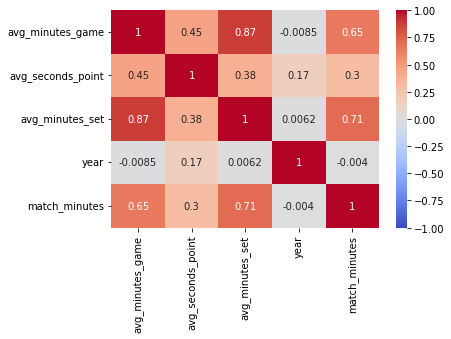

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df1.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

### NIVELL 3

### Ex4
##### Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.
##### df1['avg_minutes_game']

In [128]:
def g_mean(x):
    a = np.log(x)
    return np.exp(a.mean())

geometrical_mean = g_mean(df1['avg_minutes_game'])
print (r'Mitjana geomètrica = {}'.format(geometrical_mean))

Mitjana geomètrica = 0.0


C:\Users\Toni Andreu\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [129]:
from scipy.stats.mstats import gmean
gm = gmean(df1['avg_minutes_game'])
print (r'Mitjana geomètrica = {}'.format(gm))

Mitjana geomètrica = 0.0


C:\Users\Toni Andreu\AppData\Roaming\Python\Python39\site-packages\scipy\stats\stats.py:275: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
